# **MODUL 2 PRAKTIKUM SAINS DATA**

Kembali ke [Sains Data](./saindat2022genap.qmd)

### **Outline:**
- Regresi Linier Sederhana
- Regresi Linier Berganda

# Regresi Linier Sederhana

Regresi Linear sederhana adalah regresi yang menggunakan **satu variabel bebas** untuk memprediksi variabel terikat yang nilainya bersifat
kontinu.

## Import Module

In [1]:
#import module dan package yang diperlukan
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Pada module kali ini, akan digunakan data csv Fuel Consumption of CO2 (`FuelConsumptionCo2.csv`) yang bisa didownload dari:

- [Kaggle](https://www.kaggle.com/datasets/mohamedjafirashraf/fuel-consumption-co2?resource=download)

## Import Data

In [2]:
df = pd.read_csv('/content/FuelConsumptionCo2.csv')

In [3]:
#lihat cuplikan data dari dataframe
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


> Kali ini kita akan membuat model regresi linear untuk memprediksi nilai dari CO2EMISSION

## Eksplorasi Data

Statistik deskriptif dari data frame

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Kita dapat memilih beberapa feature/kolom yang kita duga berpengaruh terhadap nilai dari CO2EMISSION

In [5]:
 #definisikan dataframe baru bernama cdf
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Mari visualisasikan sebaran datanya menggunakan histogram

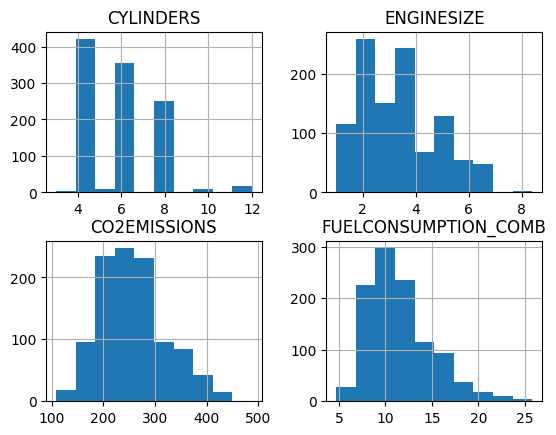

In [6]:
#membuat histogram
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Selanjutnya, kita akan melihat hubungan antara ketiga kolom/feature dengan CO2Emission menggunakan scatter plot.


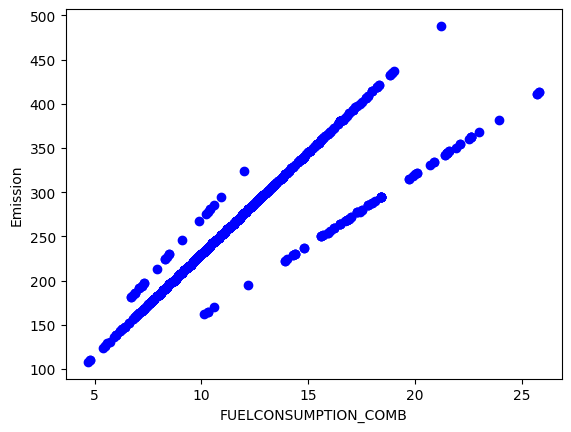

In [7]:
#scatter plot untuk fuelconsumption_comb
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

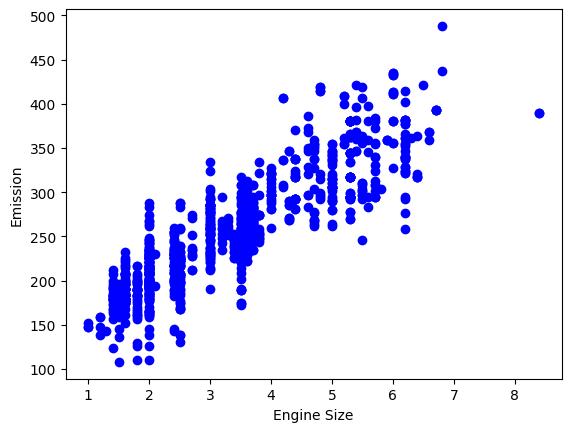

In [8]:
#scatter plot untuk enginesize
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

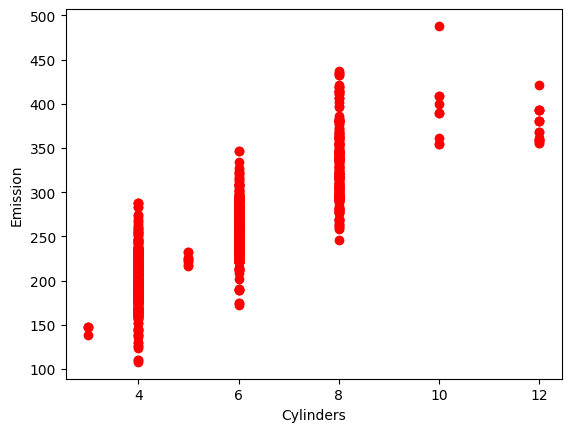

In [9]:
 #scatter plot untuk cylinders
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

> dari ketiga visualisasi diatas, scatter plot Engine Size dan Fuel Consumption terlihat menarik untuk diteliti lebih jauh.
Langkah selanjutnya kita akan membuat model untuk memprediksi Emisi CO2 (CO2 Emission) berdasarkan Ukuran Mesin
(Engine Size) dan model untuk memprediksi Emisi CO2 (CO2 Emission) berdasarkan Konsumsi Bahan Bakar (Fuel
Consumption)

## Train-Test Set

Pertama tama, kita bagi data yang kita punya sebagai data latih (untuk melatih model) dan data uji (untuk menguji model).

Data uji diperlukan agar kita dapat melihat akurasi dari model yang telah dibuat.

Data latih dan data uji harus bersifat saling lepas (tidak memiliki irisan) agar memberikan gambaran peforma model terhadap data baru

In [10]:
#memisahkan data train dan test dengan perbandingan 8:2
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Regresi Linear Sederhana (Engine Size vs. CO2 Emissions)

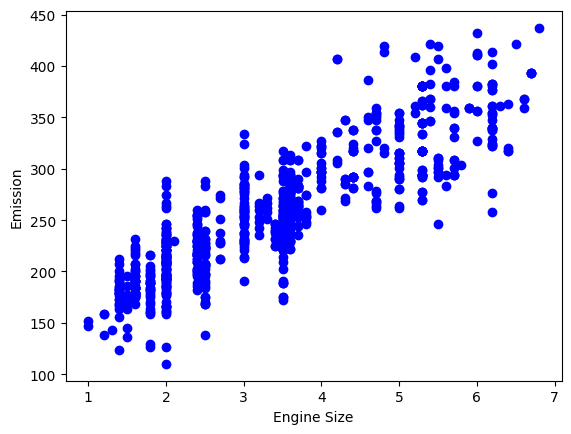

In [11]:
 #scatter plot dari data latih
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

## Membuat model

Untuk membuat model, kita akan menggunakan LinearRegression dari package sklearn

In [12]:
#import package sklearn dan modul linear_model
from sklearn import linear_model
#definisikan model regresi linier dengan nama 'regr'
regr = linear_model.LinearRegression()
#definisikan fitur/kolom yang akan di-fit kedalam model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
#fit data training ke model regr
regr.fit(train_x, train_y)
#output koefisien dan intersepnya
print('Coefficients: ', regr.coef_)
print('y-Intercept: ', regr.intercept_)

Coefficients:  [[38.54948831]]
y-Intercept:  [126.65891652]


sehingga diperoleh fungsi: $y = 38.549x+126.658$

Selanjutnya, kita dapat visualisasikan fungsi diatas beserta scatter plot dari data latih.

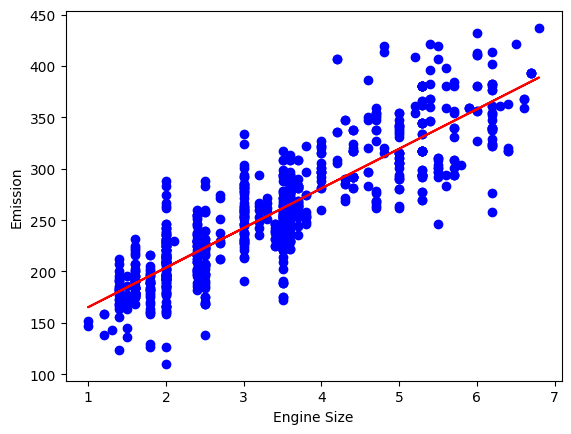

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
#visualisasi fungsi yang diperoleh
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

## Evaluasi Model

Tahap terakhir adalah membandingkan nilai aktual (nilai y yang ada pada data test) dengan nilai prediksi (nilai y setelah x test
disubstitusikan ke fungsi yang telah diperoleh)
Selisih nilai aktual dan prediksi disebut error.

Beberapa metriks/ukuran yang dapat digunakan utk evaluasi model:
- **Mean Absolute Error**: Mean dari mutlak dari error. Paling mudah dipahami, sebab berupa kesalahan rata-rata.
- **Mean Squared Error (MSE)**: Rata-rata dari error kuadrat. Lebih populer daripada MAE karena fokusnya lebih diarahkan pada
kesalahan besar. Ini karena suku kuadrat secara eksponensial meningkatkan kesalahan yang lebih besar dibandingkan dengan
kesalahan yang lebih kecil.
- **Root Mean Squared Error (RMSE)**: akar dari MSE.
- **R-square (R-2)** : metrik populer untuk mengukur kinerja model regresi. Mewakili seberapa dekat titik data dengan garis regresi yang
dipasang. Semakin tinggi nilai R-2, semakin baik model tersebut sesuai dengan data. Skor terbaik adalah 1.0 dan bisa juga bernilai
negatif.


In [14]:
#gunakan package sklearn.metrics utk melihat evaluasi model
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 24.75
Residual sum of squares (MSE): 1133.59
R2-score: 0.76


## Regression (Fuel Consumption vs. CO2 Emission)

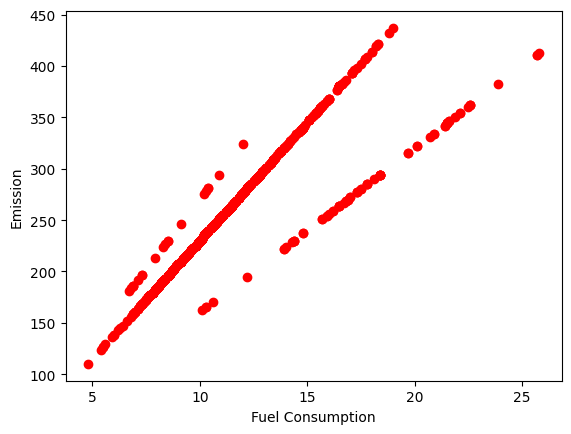

In [15]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'red')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

In [16]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coefficients: ', regr.coef_)
print('y-Intercept: ', regr.intercept_)

Coefficients:  [[15.99115452]]
y-Intercept:  [71.06166585]


sehingga diperoleh fungsi: $y = 15.991x+71.061$

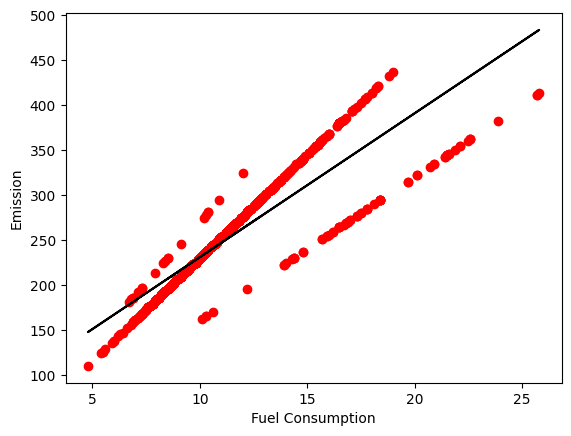

In [17]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-k')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()

In [18]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 21.10
Residual sum of squares (MSE): 849.92
R2-score: 0.82


> Berdasarkan perbandingan MAE, MSE dan R2-scorenya dapat disimpulkan bahwa model regresi linier Fuel Consumption vs.
CO2 Emission lebih baik dari model regresi linier Engine Size vs. CO2 Emission.


# Multiple Linear Regression

Regresi Linear sederhana adalah regresi yang menggunakan **lebih dari satu variabel bebas** untuk memprediksi variabel terikat yang
nilainya bersifat kontinu.


In [19]:
#seperti biasa, kita lihat cuplikan data frame
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [20]:
#ambil kolom/feature yang diduga berpengaruh terkait emisi CO2
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


## Train/Test Set

In [21]:
#memisah data uji dan data latih dgn perbandingan 8:2
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [22]:
#membuat model
regr = linear_model.LinearRegression()
#perhatikan pada x, dipilih beberapa feature/kolom sebagai variabel bebasnya. kali ini akan dibuat model
#berdasarkan ukuran mesin, banyak tabung, dan konsumsi bahan bakar
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[10.77193129  7.70821711  9.51766547]]
Intercept:  [64.90866441]


$y=10.771x_1 + 7.708x_2 + 9.517x_3 + 64.908$

## Evaluasi Model

**Explained Variance**: Misal ŷ adalah prediksi, y adalah nilai aktual, dan Var adalah Varians (kuadrat dari standar deviasi).

$\text{explainedVariance} (y,ŷ) = 1-\frac{\text{Var }y-ŷ}{\text{Var }y}$

Skor terbaik adalah 1. Semakin rendah berarti kinerja model lebih buruk.

**Residual Sum of Square (RSS)**: Sum dari error kuadrat. Semakin tinggi nialinya, maka kinerja model lebih buruk.


In [23]:
#evaluasi fungsi diatas
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print("Variance score: %.2f" % regr.score(x, y))

Residual sum of squares: 462.42
Variance score: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Membuat Model Pembanding

'FUELCONSUMPTION_COMB' digantikan dengan 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY'

In [24]:
regr = linear_model.LinearRegression()
#perhatikan pada x, dipilih beberapa feature/kolom sebagai variabel bebasnya. kali ini akan dibuat model
#berdasarkan ukuran mesin, banyak tabung, konsumsi bahan bakar dalam kota dan konsumsi bahan bakar luar kota
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[10.89417412  7.24796498  6.44569745  2.65762343]]
Intercept:  [66.53100166]


$y=10.894x_1 + 7.247x_2 + 6.445x_3 + 2.657x_4 + 66.531$

In [25]:
#evaluasi model diatas
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
print("Variance score: %.2f" % regr.score(x, y))

Residual sum of squares: 465.14
Variance score: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


> Berdasarkan Residual sum of square (RSS) dari kedua model, terlihat bahwa model regresi
$$y=10.894x_1 + 7.247x_2 + 6.445x_3 + 2.657x_4 + 66.531$$
memiliki performa sedikit lebih baik dibandingkan dengan model regresi
$$y=10.771x_1 + 7.708x_2 + 9.517x_3 + 64.908$$


